In [18]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#폰트 설정 
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes", unicode_minus = False)

In [19]:
df = pd.read_csv("C:/Users/user/Desktop/A2_유아용품/Member_data.csv")
df = df.dropna()



C:\Users\user\AppData\Local\Temp\ipykernel_20064\3353620190.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/user/Desktop/A2_유아용품/Member_data.csv")


In [20]:
df

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [17]:
df['가입일자'] = 0

for i in range(len(df)):
    df['가입일자'][i] = str(df['고객번호'][i])[0:8]

df['가입일자'].value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_20064\1646218974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가입일자'][i] = str(df['고객번호'][i])[0:8]


20190301    1424
20191217    1342
20190130    1233
20190131     735
20191218     730
20191022     700
20190201     687
20191024     673
20191219     636
20191010     603
Name: 가입일자, dtype: int64

In [5]:
df['q'] = 0
rows = zip(df['거주지역'], df['유입경로'])

headers = ['거주지역', '유입경로']


df = pd.DataFrame(list(rows), columns=headers)

df

,거주지역,유입경로
0,인천,인스타그램
1,제주,검색광고
2,부산,네이버블로그
3,경남,지인추천
4,서울,직접검색
...,...,...
81089,경기,오픈마켓
81090,경남,오픈마켓
81091,충북,검색광고
81092,경기,인스타그램


In [6]:
df.plot(kind="bar",stacked=True,figsize=(15,10))

TypeError: no numeric data to plot

<AxesSubplot: >

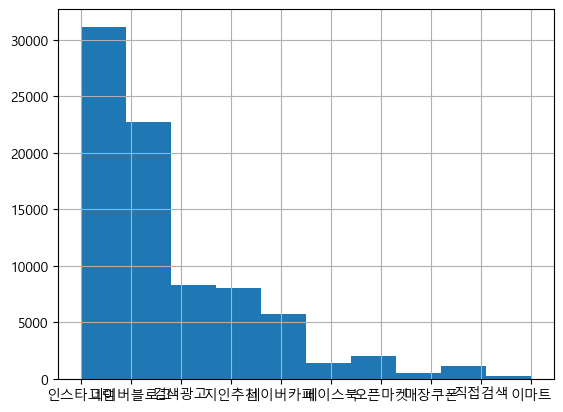

In [ ]:
df['유입경로'].hist()

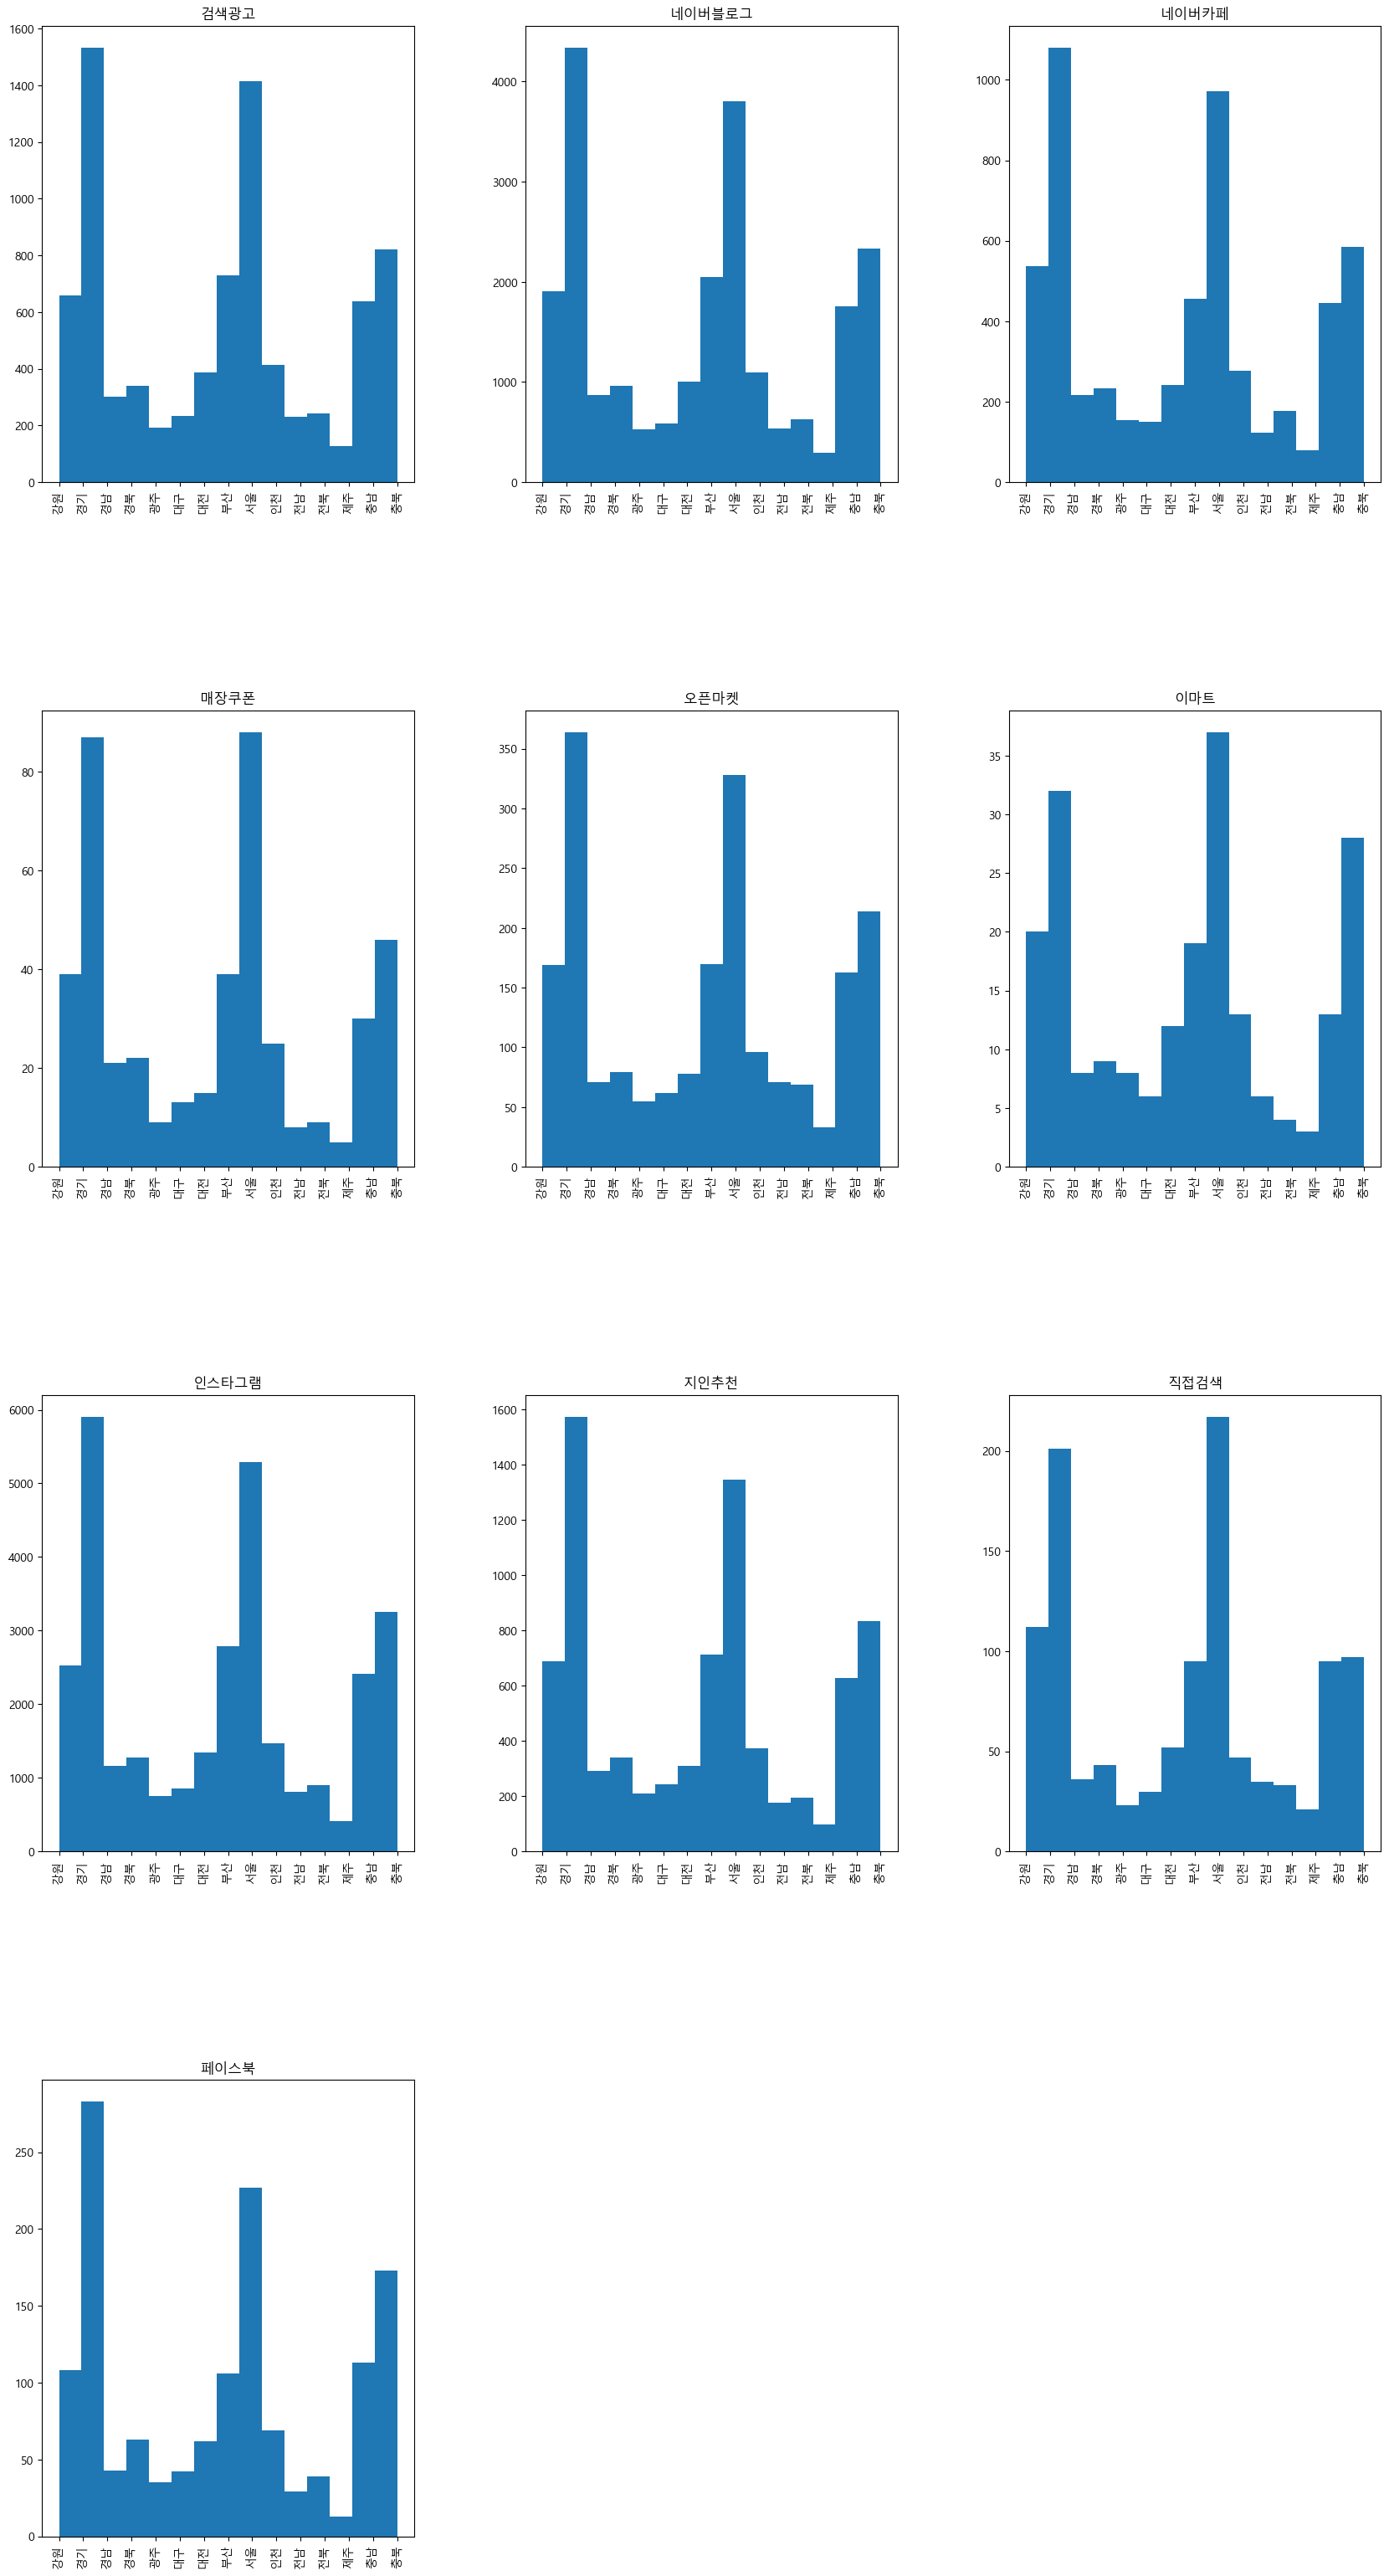

In [ ]:
df.hist('거주지역','유입경로',bins= 15,figsize=(20,40))
plt.savefig('지역유입그래프.png')

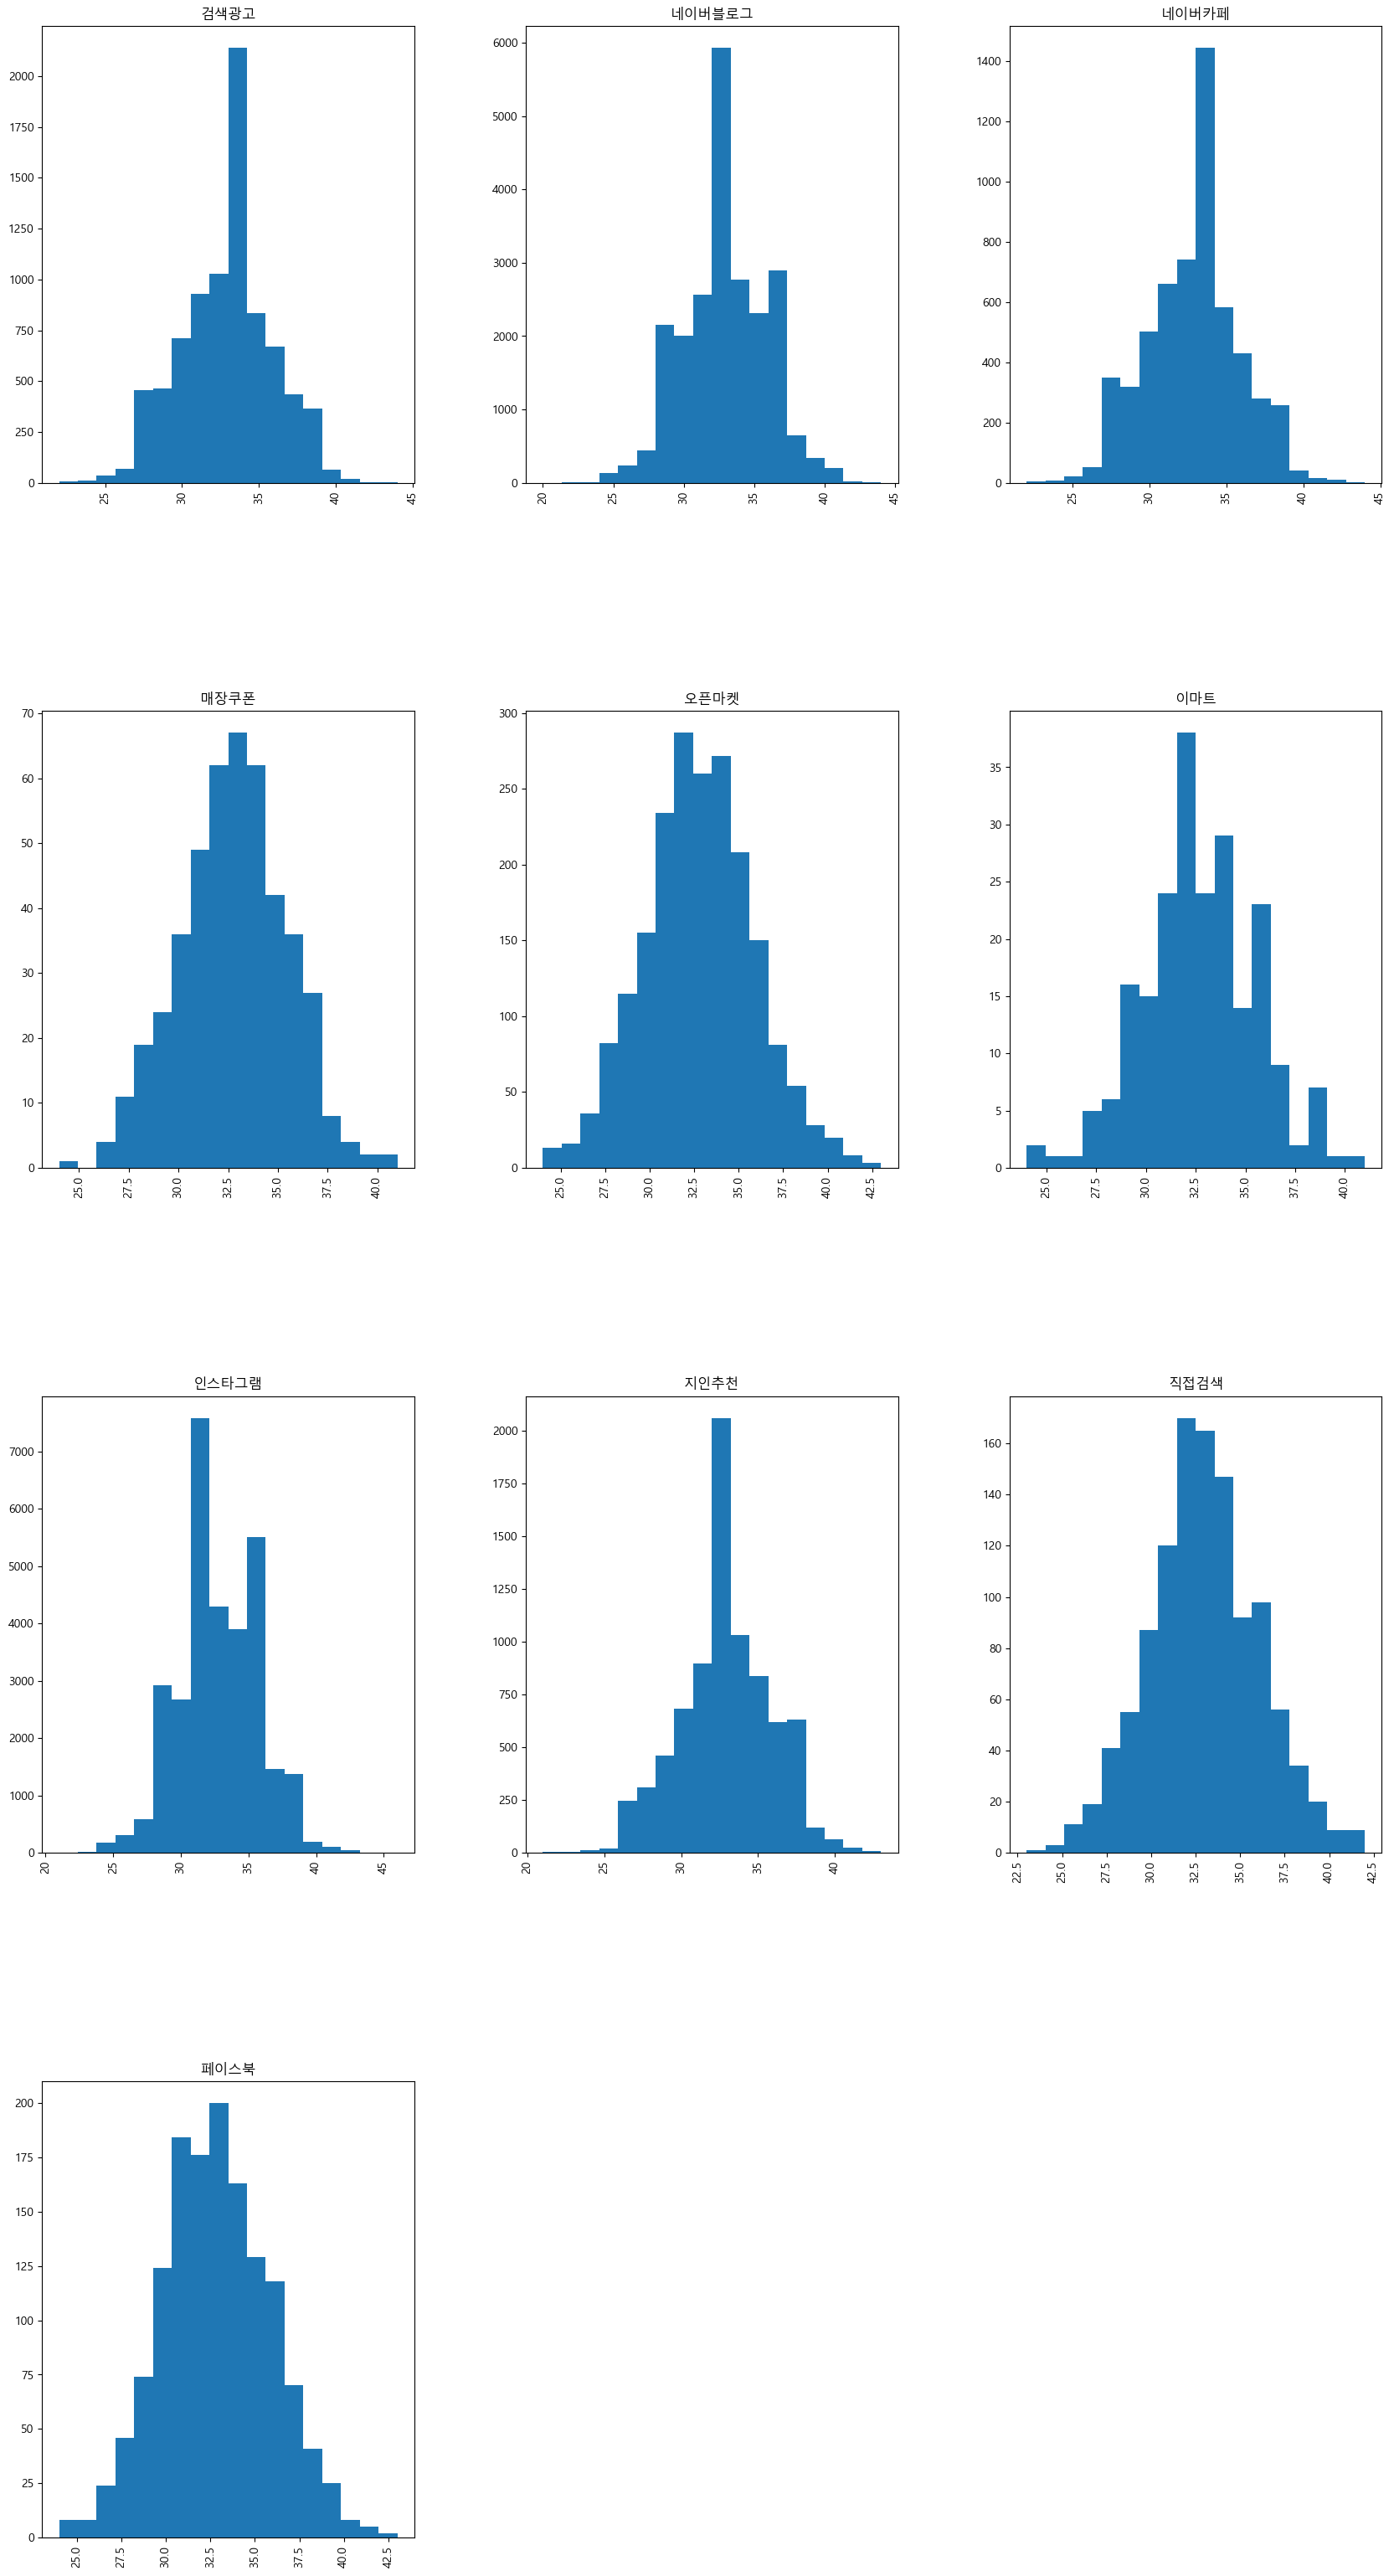

In [ ]:
df= df.sort_values('연령')
df.hist('연령','유입경로',bins= 18,figsize=(20,40))
plt.savefig('연령유입그래프.png')

In [21]:
for i in range(len(df)):
    if df['유입경로'][i]=="네이버카페":
        df['유입경로'][i] = '기타'
    if df['유입경로'][i]=="페이스북":
        df['유입경로'][i] = '기타'
    if df['유입경로'][i]=="직접검색":
        df['유입경로'][i] = '기타'
    if df['유입경로'][i]=="오픈마켓":
        df['유입경로'][i] = '기타'
    if df['유입경로'][i]=="매장쿠폰":
        df['유입경로'][i] = '기타'
    if df['유입경로'][i]=="이마트":
        df['유입경로'][i] = '기타'


C:\Users\user\AppData\Local\Temp\ipykernel_20064\3791842758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['유입경로'][i] = '기타'
C:\Users\user\AppData\Local\Temp\ipykernel_20064\3791842758.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['유입경로'][i] = '기타'
C:\Users\user\AppData\Local\Temp\ipykernel_20064\3791842758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['유입경로'][i] = '기타'
C:\Users\user\AppData\Local\Temp\ipykern

AttributeError: Rectangle.set() got an unexpected keyword argument 'stacked'

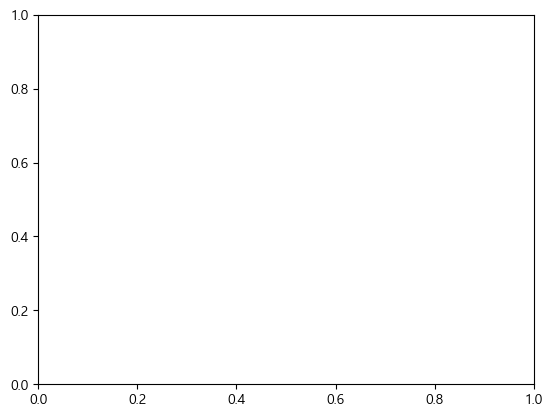

In [28]:
plt.bar(df[df['유입경로']=="인스타그램"]["연령"],label = '인스타그램',  stacked= True,height=10)
plt.bar(df[df['유입경로']=="네이버블로그"]["연령"],label = '네이버블로그',  stacked= True,height=10)
plt.bar(df[df['유입경로']=="검색광고"]["연령"],label = '검색광고',  stacked= True,height=10)
plt.bar(df[df['유입경로']=="지인추천"]["연령"],label = '지인추천',  stacked= True,height=10)
plt.bar(df[df['유입경로']=="기타"]["연령"],label = '기타',  stacked= True,height=10)
plt.legend()

In [29]:
df
df

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,기타,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,기타,Yes
81090,201912291058167,여,기혼,경남,37.0,롯데카드,기타,Yes
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


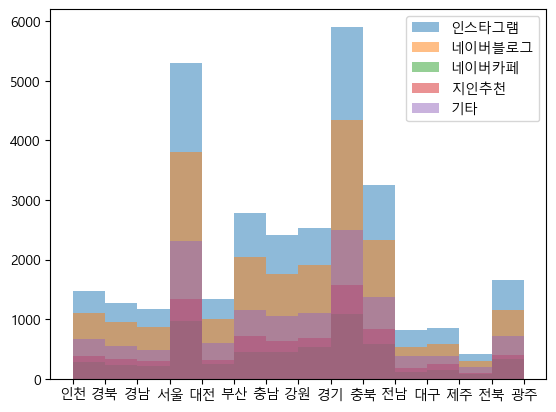

In [9]:
plt.hist(df[df['유입경로']=="인스타그램"]["거주지역"],label = '인스타그램', alpha= 0.5, bins= 14)
plt.hist(df[df['유입경로']=="네이버블로그"]["거주지역"],label = '네이버블로그', alpha= 0.5, bins= 14)
plt.hist(df[df['유입경로']=="네이버카페"]["거주지역"],label = '네이버카페', alpha= 0.5, bins= 14)
plt.hist(df[df['유입경로']=="지인추천"]["거주지역"],label = '지인추천', alpha= 0.5, bins= 14)
plt.hist(df[df['유입경로']=="기타"]["거주지역"],label = '기타', alpha= 0.5, bins= 14)
plt.legend()
plt.savefig('지역별유입경로.png')

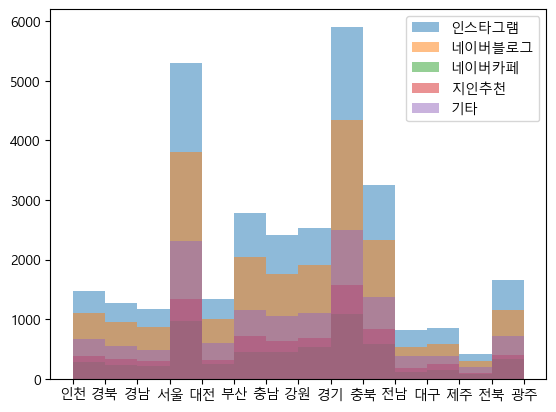

In [10]:
plt.hist(df[df['유입경로']=="인스타그램"]["거주지역"],label = '인스타그램', alpha= 0.5, bins= 14,stacked=True)
plt.hist(df[df['유입경로']=="네이버블로그"]["거주지역"],label = '네이버블로그', alpha= 0.5, bins= 14,stacked=True)
plt.hist(df[df['유입경로']=="네이버카페"]["거주지역"],label = '네이버카페', alpha= 0.5, bins= 14,stacked=True)
plt.hist(df[df['유입경로']=="지인추천"]["거주지역"],label = '지인추천', alpha= 0.5, bins= 14,stacked=True)
plt.hist(df[df['유입경로']=="기타"]["거주지역"],label = '기타', alpha= 0.5, bins= 14,stacked=True)
plt.legend()
plt.savefig('지역별유입경로.png')

In [ ]:
df['가입일자'] = 0
for i in range(len(df)):
    df['가입일자'][i]= str(df['고객번호'][i])[0:8]
    

C:\Users\user\AppData\Local\Temp\ipykernel_20176\1942761529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가입일자'][i]= str(df['고객번호'][i])[0:8]


In [ ]:
df=df.sort_values('가입일자')
df

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,20181231
71,201812310749988,여,기혼,부산,29.0,대구은행,네이버카페,Yes,20181231
70,201812310749984,남,기혼,경기,33.0,국민은행,인스타그램,Yes,20181231
69,201812310749982,여,기혼,부산,33.0,새마을금고,인스타그램,Yes,20181231
68,201812310749980,여,기혼,서울,36.0,신한카드,검색광고,Yes,20181231
...,...,...,...,...,...,...,...,...,...
81069,201912291058061,여,기혼,대구,32.0,국민은행,네이버블로그,Yes,20191229
81070,201912291058064,여,기혼,경기,33.0,롯데카드,지인추천,Yes,20191229
81071,201912291058070,여,미혼,대전,31.0,농협중앙회,인스타그램,No,20191229
81073,201912291058094,여,미혼,인천,31.0,농협중앙회,네이버블로그,No,20191229


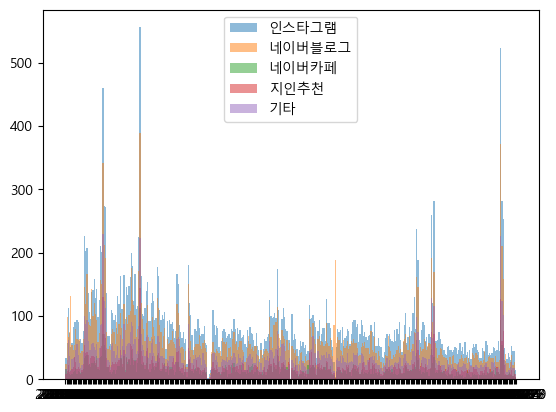

In [ ]:
plt.hist(df[df['유입경로']=="인스타그램"]["가입일자"],label = '인스타그램', alpha= 0.5, bins= 365)
plt.hist(df[df['유입경로']=="네이버블로그"]["가입일자"],label = '네이버블로그', alpha= 0.5, bins= 365)
plt.hist(df[df['유입경로']=="네이버카페"]["가입일자"],label = '네이버카페', alpha= 0.5, bins= 365)
plt.hist(df[df['유입경로']=="지인추천"]["가입일자"],label = '지인추천', alpha= 0.5, bins= 365)
plt.hist(df[df['유입경로']=="기타"]["가입일자"],label = '기타', alpha= 0.5, bins= 365)
plt.legend()
plt.savefig('가입일자별유입경로.png')

In [ ]:
df['가입월'] = 0
for i in range(len(df)):
    if df['가입일자'][i][4:6] == '12':
        df['가입월'][i] = '12월'
    elif df['가입일자'][i][4:6] == '01':
        df['가입월'][i] = '01월'
    elif df['가입일자'][i][4:6] == '02':
        df['가입월'][i] = '02월'
    elif df['가입일자'][i][4:6] == '03':
        df['가입월'][i] = '03월'
    elif df['가입일자'][i][4:6] == '04':
        df['가입월'][i] = '04월'
    elif df['가입일자'][i][4:6] == '05':
        df['가입월'][i] = '05월'
    elif df['가입일자'][i][4:6] == '06':
        df['가입월'][i] = '06월'
    elif df['가입일자'][i][4:6] == '07':
        df['가입월'][i] = '07월'
    elif df['가입일자'][i][4:6] == '08':
        df['가입월'][i] = '08월'
    elif df['가입일자'][i][4:6] == '09':
        df['가입월'][i] = '09월'
    elif df['가입일자'][i][4:6] == '10':
        df['가입월'][i] = '10월'
    elif df['가입일자'][i][4:6] == '11':
        df['가입월'][i] = '11월'
df

C:\Users\user\AppData\Local\Temp\ipykernel_20176\1858887871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가입월'][i] = '12월'


,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자,가입월
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,20181231,12월
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,20181231,12월
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,20181231,12월
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,20181231,12월
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,20181231,12월
...,...,...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,20191229,12월
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,20191229,12월
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,20191229,12월
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,20191229,12월


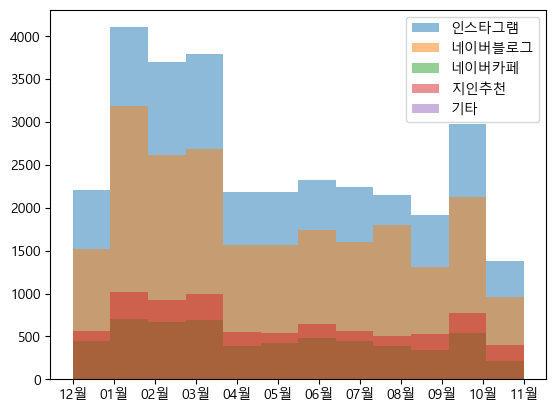

In [ ]:
plt.hist(df[df['유입경로']=="인스타그램"]["가입월"],label = '인스타그램', alpha= 0.5, bins= 12)
plt.hist(df[df['유입경로']=="네이버블로그"]["가입월"],label = '네이버블로그', alpha= 0.5, bins= 12)
plt.hist(df[df['유입경로']=="네이버카페"]["가입월"],label = '네이버카페', alpha= 0.5, bins= 12)
plt.hist(df[df['유입경로']=="지인추천"]["가입월"],label = '지인추천', alpha= 0.5, bins= 12)
plt.hist(df[df['유입경로']=="기타"]["가입월"],label = '기타', alpha= 0.5, bins= 12)
plt.legend()
plt.savefig('가입월별유입경로.png')

In [ ]:
df.to_csv("C:/Users/user/Desktop/A2_유아용품/newmember_data.csv",encoding='euc-kr')

In [ ]:
zzz = df['가입일자'].value_counts()
zzz

20190301    1424
20191217    1342
20190130    1233
20190131     735
20191218     730
            ... 
20190408      75
20191229      39
20190427      35
20190426      16
20190425       3
Name: 가입일자, Length: 364, dtype: int64

In [ ]:
df2=df[df['가입일자']=='20190301']
df2

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자,가입월
21319,201903010820142,여,기혼,충북,30.0,국민은행,인스타그램,Yes,20190301,03월
21321,201903010820145,여,기혼,인천,33.0,농협중앙회,네이버블로그,No,20190301,03월
21320,201903010820144,여,기혼,충남,32.0,신한은행,네이버카페,Yes,20190301,03월
21309,201903010820126,여,미혼,인천,29.0,우리은행,지인추천,No,20190301,03월
21323,201903010820151,여,기혼,서울,30.0,농협중앙회,인스타그램,Yes,20190301,03월
...,...,...,...,...,...,...,...,...,...,...
20842,201903010819248,여,기혼,충남,34.0,농협중앙회,인스타그램,Yes,20190301,03월
20841,201903010819246,여,기혼,충북,35.0,농협중앙회,네이버블로그,Yes,20190301,03월
20840,201903010819245,여,미혼,대구,34.0,롯데카드,인스타그램,No,20190301,03월
20839,201903010819242,여,기혼,경남,34.0,롯데카드,지인추천,Yes,20190301,03월


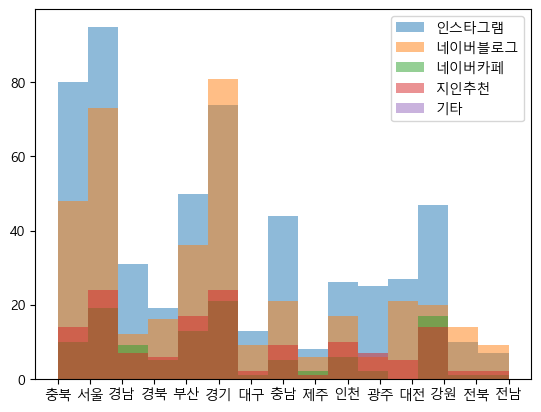

In [ ]:
plt.hist(df2[df2['유입경로']=="인스타그램"]["거주지역"],label = '인스타그램', alpha= 0.5, bins= 15)
plt.hist(df2[df2['유입경로']=="네이버블로그"]["거주지역"],label = '네이버블로그', alpha= 0.5, bins= 15)
plt.hist(df2[df2['유입경로']=="네이버카페"]["거주지역"],label = '네이버카페', alpha= 0.5, bins= 15)
plt.hist(df2[df2['유입경로']=="지인추천"]["거주지역"],label = '지인추천', alpha= 0.5, bins= 15)
plt.hist(df2[df2['유입경로']=="기타"]["거주지역"],label = '기타', alpha= 0.5, bins= 15)
plt.legend()

In [ ]:
df3=df[df['가입일자']=='20191217']
df3

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자,가입월
78286,201912171048404,여,기혼,강원,31.0,우리은행,인스타그램,Yes,20191217,12월
78287,201912171048408,여,기혼,충북,41.0,SC제일은행,인스타그램,Yes,20191217,12월
78288,201912171048409,여,기혼,충북,34.0,롯데카드,검색광고,Yes,20191217,12월
78276,201912171048371,여,기혼,부산,37.0,농협회원조합,지인추천,Yes,20191217,12월
78290,201912171048414,여,미혼,충북,29.0,하나은행,인스타그램,No,20191217,12월
...,...,...,...,...,...,...,...,...,...,...
77838,201912171047122,여,기혼,경북,34.0,국민은행,인스타그램,Yes,20191217,12월
77837,201912171047121,남,기혼,경남,25.0,국민은행,지인추천,Yes,20191217,12월
77836,201912171047117,여,기혼,인천,34.0,국민은행,인스타그램,Yes,20191217,12월
77835,201912171047116,여,기혼,경남,36.0,농협회원조합,네이버블로그,Yes,20191217,12월


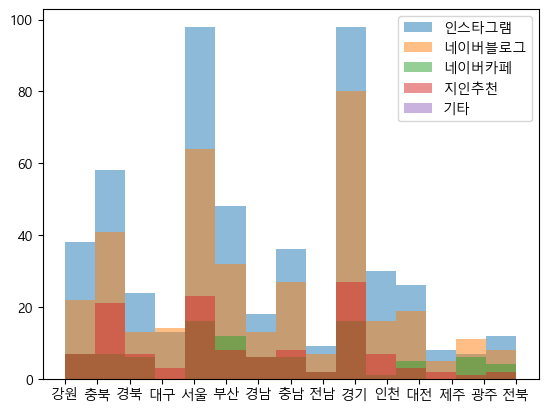

In [ ]:
plt.hist(df3[df3['유입경로']=="인스타그램"]["거주지역"],label = '인스타그램', alpha= 0.5, bins= 15)
plt.hist(df3[df3['유입경로']=="네이버블로그"]["거주지역"],label = '네이버블로그', alpha= 0.5, bins= 15)
plt.hist(df3[df3['유입경로']=="네이버카페"]["거주지역"],label = '네이버카페', alpha= 0.5, bins= 15)
plt.hist(df3[df3['유입경로']=="지인추천"]["거주지역"],label = '지인추천', alpha= 0.5, bins= 15)
plt.hist(df3[df3['유입경로']=="기타"]["거주지역"],label = '기타', alpha= 0.5, bins= 15)
plt.legend()

In [ ]:
df4=df[df['가입일자']=='20190130']
df4

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자,가입월
9764,201901300781792,여,기혼,전남,32.0,신한은행,인스타그램,Yes,20190130,01월
9763,201901300781791,여,기혼,충남,38.0,우리은행,인스타그램,Yes,20190130,01월
9751,201901300781759,여,기혼,경북,32.0,농협회원조합,인스타그램,Yes,20190130,01월
9762,201901300781790,여,기혼,대전,26.0,농협중앙회,네이버블로그,Yes,20190130,01월
9761,201901300781789,남,기혼,충남,26.0,농협회원조합,네이버블로그,Yes,20190130,01월
...,...,...,...,...,...,...,...,...,...,...
9350,201901300780744,여,기혼,경북,29.0,우체국,네이버블로그,No,20190130,01월
9349,201901300780743,여,기혼,부산,28.0,새마을금고,검색광고,Yes,20190130,01월
9348,201901300780741,여,기혼,부산,37.0,농협중앙회,네이버블로그,Yes,20190130,01월
9347,201901300780736,여,기혼,충북,33.0,신한은행,인스타그램,Yes,20190130,01월


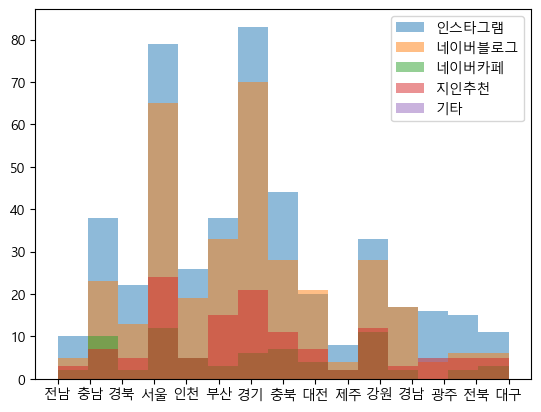

In [ ]:
plt.hist(df4[df4['유입경로']=="인스타그램"]["거주지역"],label = '인스타그램', alpha= 0.5, bins= 15)
plt.hist(df4[df4['유입경로']=="네이버블로그"]["거주지역"],label = '네이버블로그', alpha= 0.5, bins= 15)
plt.hist(df4[df4['유입경로']=="네이버카페"]["거주지역"],label = '네이버카페', alpha= 0.5, bins= 15)
plt.hist(df4[df4['유입경로']=="지인추천"]["거주지역"],label = '지인추천', alpha= 0.5, bins= 15)
plt.hist(df4[df4['유입경로']=="기타"]["거주지역"],label = '기타', alpha= 0.5, bins= 15)
plt.legend()

In [31]:
df_sale = pd.read_csv("C:/Users/user/Downloads/new_sales4.csv", encoding='euc-kr')
df_sale

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,티슈,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,201902,0.32
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00
199512,201912283245128,2019-12-29,2019-12-30,2020-01-01,NaN,201912281058007,65880,52065,아이_생활용품,하기스 매직핏 꿀벅지 아기용 기저귀 3단계 공용 198매(밴드형),1.000000,201912,0.21
199513,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00


In [32]:
df_sale['유입경로'] = 0
for i in range(len(df_sale)):
    for j in range(len(df)):
        if df_sale['고객번호'][i] == df['고객번호'][j]:
            df_sale['유입경로'][i] = df['유입경로'][j]

C:\Users\user\AppData\Local\Temp\ipykernel_20064\1187997207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['유입경로'][i] = df['유입경로'][j]


In [ ]:
df_sale4 = df_sale[df_sale['가입일자']=='20190130']
df_sale4

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,가입일자
25479,201901301957740,2019-01-30,2019-01-31,2019-02-02,4.0,201901300779655,52100,39070,더블하트,더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouc...,20190130
25480,201901301957740,2019-01-30,2019-01-31,2019-02-02,4.0,201901300779655,39200,38808,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀),20190130
25481,201904192297139,2019-04-20,2019-04-21,2019-04-23,7.0,201901300779655,17800,12670,더블하트,더블하트 젖병세정제 거품형 700ml(용기) + 650ml(리필),20190130
25482,201904192297139,2019-04-20,2019-04-21,2019-04-23,7.0,201901300779655,11400,10156,FC,화이트 시크릿홀 가든프레시뉴 울트라 날개 대형 16개입,20190130
25483,201908072701008,2019-08-08,2019-08-09,2019-08-11,11.0,201901300779655,24800,12400,FC,[동일상품 1+1] 화이트 입는 오버나이트 대형 L 8개입,20190130
...,...,...,...,...,...,...,...,...,...,...,...
28216,201903312215672,2019-03-31,2019-04-01,2019-04-03,NaN,201901300782946,11800,7880,FC,좋은느낌 입는 오버나이트 대형 8개입,20190130
28217,201907302664657,2019-07-30,2019-07-31,2019-08-02,NaN,201901300782946,3900,3861,FC,좋은느낌 순수 팬티라이너 롱 18개입,20190130
28218,201912183192359,2019-12-19,2019-12-20,2019-12-24,NaN,201901300782946,4500,2999,FC,좋은느낌 좋은순면 팬티라이너 롱 36개입,20190130
28219,201901311975635,2019-02-01,2019-02-02,2019-02-04,7.0,201901300782955,12900,8157,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),20190130


In [ ]:
df_sale.to_csv("C:/Users/user/Desktop/A2_유아용품/구매목록가입일자추가.csv",encoding='euc-kr')

In [ ]:
type(df_sale4)

method

In [ ]:
def buydep(buy1,buy2):
    mon1 = int(buy1[5:7])
    mon2 = int(buy2[5:7])
    if mon1 > mon2:
        mon2 = mon2 + 12
    return mon2 - mon1
df['이탈구매월'] = 0
for i in range(len(df_sale)):
    if df_sale['고객번호'][i] != df_sale['고객번호'][i+1]:
        if df['고객번호'][i-1]==df['고객번호'][i]:
            df['이탈구매월'] = buydep(df['구매일'][i-1],df['구매일'][i])
df


KeyError: 81097

In [ ]:
df_sale['구매월'] = 0
for i in range(len(df_sale)):
    if df_sale['구매일'][i][5:7] == '12':
        df_sale['구매월'][i] = '12월'
    elif df_sale['구매일'][i][5:7] == '01':
        df_sale['구매월'][i] = '01월'
    elif df_sale['구매일'][i][5:7] == '02':
        df_sale['구매월'][i] = '02월'
    elif df_sale['구매일'][i][5:7] == '03':
        df_sale['구매월'][i] = '03월'
    elif df_sale['구매일'][i][5:7] == '04':
        df_sale['구매월'][i] = '04월'
    elif df_sale['구매일'][i][5:7] == '05':
        df_sale['구매월'][i] = '05월'
    elif df_sale['구매일'][i][5:7] == '06':
        df_sale['구매월'][i] = '06월'
    elif df_sale['구매일'][i][5:7] == '07':
        df_sale['구매월'][i] = '07월'
    elif df_sale['구매일'][i][5:7] == '08':
        df_sale['구매월'][i] = '08월'
    elif df_sale['구매일'][i][5:7] == '09':
        df_sale['구매월'][i] = '09월'
    elif df_sale['구매일'][i][5:7] == '10':
        df_sale['구매월'][i] = '10월'
    elif df_sale['구매일'][i][5:7] == '11':
        df_sale['구매월'][i] = '11월'

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2505263809.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['구매월'][i] = '05월'


In [ ]:
df_sale

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,가입일자,구매월
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),20181231,05월
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),20181231,02월
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,20181231,02월
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),20181231,05월
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),20181231,05월
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),20200724,07월
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,20200729,07월
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),20200803,08월
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,20200805,08월


(array([ 386.,  428., 1162.,  785.,  332.,  389.,  611.,  381.,  307.,
         555.,  256.,  548.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

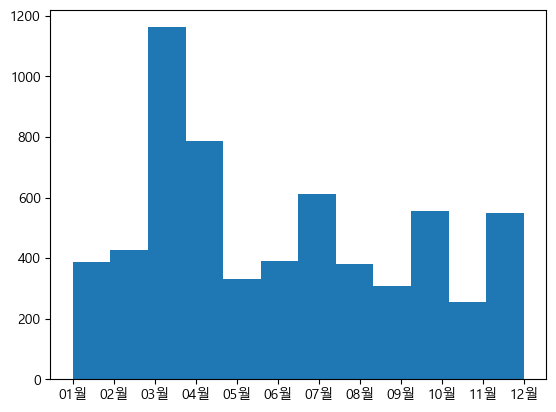

In [ ]:
plt.hist(df_sale3['구매월'],bins=12)

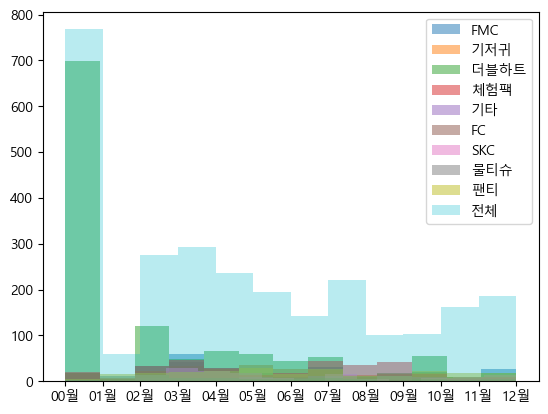

In [ ]:
plt.hist(df_sale4[df_sale4['물품대분류']=="FMC"]["구매월"],label = 'FMC', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="기저귀"]["구매월"],label = '기저귀', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="더블하트"]["구매월"],label = '더블하트', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="체험팩"]["구매월"],label = '체험팩', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="기타"]["구매월"],label = '기타', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="FC"]["구매월"],label = 'FC', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="SKC"]["구매월"],label = 'SKC', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="물티슈"]["구매월"],label = '물티슈', alpha= 0.5, bins= 13)
plt.hist(df_sale4[df_sale4['물품대분류']=="팬티"]["구매월"],label = '팬티', alpha= 0.5, bins= 13)
plt.hist(df_sale4['구매월'],label= '전체',bins=12,alpha =0.3)



plt.legend()


ValueError: `bins` must increase monotonically, when an array

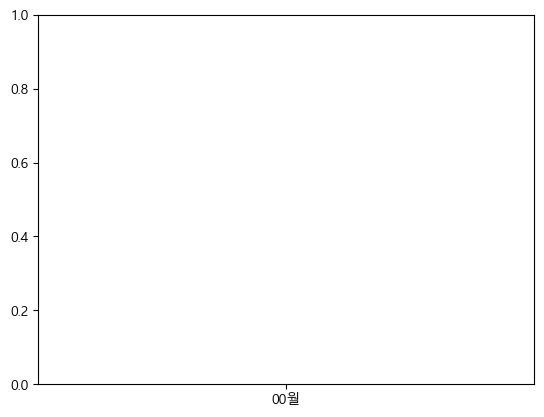

In [ ]:
df_sale['구매월'] = 0
for i in range(len(df_sale)):
    if df_sale['구매일'][i][5:7] == '12':
        df_sale['구매월'][i] = '12월'
    elif df_sale['구매일'][i][5:7] == '01':
        df_sale['구매월'][i] = '01월'
    elif df_sale['구매일'][i][5:7] == '02':
        df_sale['구매월'][i] = '02월'
    elif df_sale['구매일'][i][5:7] == '03':
        df_sale['구매월'][i] = '03월'
    elif df_sale['구매일'][i][5:7] == '04':
        df_sale['구매월'][i] = '04월'
    elif df_sale['구매일'][i][5:7] == '05':
        df_sale['구매월'][i] = '05월'
    elif df_sale['구매일'][i][5:7] == '06':
        df_sale['구매월'][i] = '06월'
    elif df_sale['구매일'][i][5:7] == '07':
        df_sale['구매월'][i] = '07월'
    elif df_sale['구매일'][i][5:7] == '08':
        df_sale['구매월'][i] = '08월'
    elif df_sale['구매일'][i][5:7] == '09':
        df_sale['구매월'][i] = '09월'
    elif df_sale['구매일'][i][5:7] == '10':
        df_sale['구매월'][i] = '10월'
    elif df_sale['구매일'][i][5:7] == '11':
        df_sale['구매월'][i] = '11월'
df_sale

C:\Users\user\AppData\Local\Temp\ipykernel_23296\2291950946.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['구매월'][i] = '05월'


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,가입일자,구매월
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),20181231,05월
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),20181231,02월
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,20181231,02월
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),20181231,05월
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),20181231,05월
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),20200724,07월
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,20200729,07월
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),20200803,08월
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,20200805,08월
